### Check the raw LBC data inter rater

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from twaidata.MRI_preprep.io import load_nii_img

In [9]:
os.listdir("/home/s2208943/LBC360222")

['LBC360222_1_CSF.nii.gz',
 'LBC360222_1_ICV.nii.gz',
 'LBC360222_1_T1brain_reg_T2.nii.gz',
 'LBC360222_1_brain.nii.gz',
 'LBC360222_1_I_T2Wbrain.nii.gz',
 'LBC360222_1_I_FLAIRbrain.nii.gz',
 'LBC360222_1_WMH_FLAIR_thresholding.nii.gz',
 'LBC360222_1_WMH.nii.gz',
 'LBC360222_1_brain_tissue.nii.gz']

In [16]:
img1, _ = load_nii_img("/home/s2208943/ipdis/data/InterRater_data/LBC360222/LBC360222_1_WMH_FLAIR_thresholding.nii.gz")
img2, _ = load_nii_img("/home/s2208943/ipdis/data/InterRater_data/LBC360222/LBC360222_1_WMH.nii.gz")
img1.shape, img2.shape

((256, 256, 80), (256, 256, 80))

In [17]:
import torch
from trustworthai.journal_run.evaluation.new_scripts.eval_helper_functions import fast_dice, fast_avd
img1 = torch.Tensor(img1.squeeze())
img2 = torch.Tensor(img2.squeeze())

In [18]:
fast_dice(img1, img2)

0.6476117372512817

In [32]:
def plot_wmhs(foldername):
    files = ["/home/s2208943/ipdis/data/InterRater_data/"+foldername + "/" + f for f in os.listdir("/home/s2208943/ipdis/data/InterRater_data/"+foldername) if "wmh" in f.lower()]
    
    plt.figure(figsize=(15, 5))
    imgs = []
    
    for i in range(len(files)):
        img, _ = load_nii_img(files[i])
        img = torch.Tensor(img).squeeze()
        imgs.append(img)
        slices = img.shape[-1]
        for j in range(3):
            plt.subplot(len(files), 3, 3 * i + j + 1)
            plt.imshow(img[:,:,int(slices * 0.25 * (j+1))])
            plt.axis('off')
            
    print(fast_dice(imgs[0], imgs[1]))

0.994355320930481


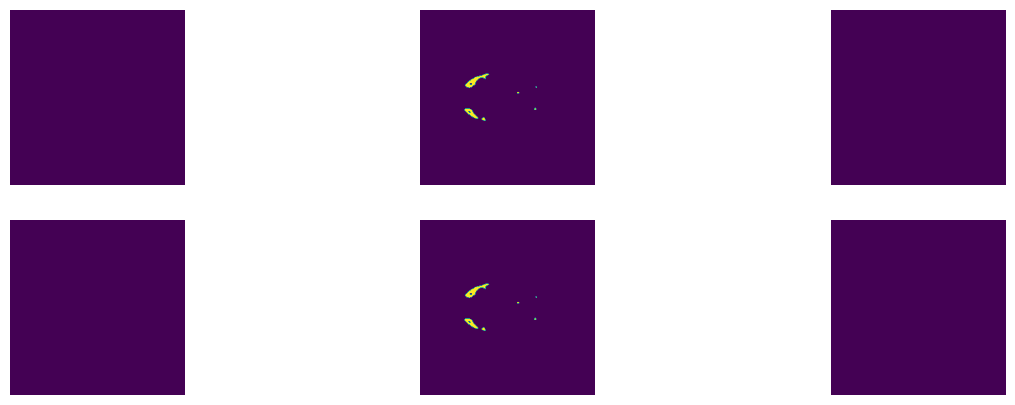

In [34]:
plot_wmhs("LBC360386")